# Vibrations of a beam due to white noise excitation

Javier Cara


## DynaSEM package

In [1]:
using DynaSEM

## Beam properties

In [2]:
# Elasticity modulus
E = 2.1e11 # N/m2 

# material density
rho = 7850.0 # kg/m3

# cross section: rectangular
b = 2.0 # base (m)
h = 0.20 # height (m)
I = 1/12*b*h^3 # moment of inertia (m4)
A = b*h # section (m2)

# beam length
L = 20.0 # m

20.0

## Beam finite element model

In [3]:
# number of elements
ne = 18

# spring constants at ends
k1 = 100*E*I
k2 = 100*E*I

# mass and stiffness matrices
K,M = beam01(E,rho,A,I,L,ne,k1,k2)

# number of degrees of freedom
ndof = size(K,1)

# modal damping
zm = 0.02*ones(ndof);

## Vibration properties

In [4]:
# Nyquist frequency (Hz)
fnq = 25.0

# sampling frequency (Hz)
fs = 2*fnq

# time step (seconds)
dt = 1/fs

# total length of the signal (seconds)
T = 100.0

# number of time steps
nt = Int(T/dt)

# time vector
time = (0:nt-1)*dt

0.0:0.02:99.98

## Load definition (white noise)

In [5]:
var_F = 100 # variance of the white noise
srand(1) # seed for the random numbers
Famb = sqrt(var_F)*randn(nt)
Jamb = zeros(ndof,1)
nodef = 4 # node where the load is applied
Jamb[2*nodef-1] = 1 # node 4, dof = 2*4-1 = 7
Famb = reshape(Famb,1,nt) # as row vector, for matrix multiplication
Famb = Jamb*Famb # ambient load forces

38×5000 Array{Float64,2}:
 0.0      0.0       0.0       0.0       …    0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0       …    0.0     0.0        0.0   
 2.97288  3.82396  -5.97634  -0.104452     -18.8896  2.11358  -15.7388
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0       …    0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 0.0      0.0       0.0       0.0            0.0     0.0        0.0   
 ⋮                                      ⋱          

## Beam vibrations

In [6]:
# modal superposition
nm = 4 # number of modes considered in the analysis
q,q1,q2 = modalmethod(M,K,zm,Famb,nm,dt)


(
[0.0 4.63922e-11 … -3.5424e-10 -3.09561e-10; 0.0 2.01524e-8 … -4.2593e-7 -4.29418e-7; … ; 0.0 -1.20792e-11 … 6.2072e-10 -4.29311e-10; 0.0 2.07925e-9 … -3.68753e-7 1.51407e-7],

[0.0 3.0867e-9 … 5.56083e-9 -1.34973e-8; 0.0 1.55753e-6 … -2.11121e-6 -2.87364e-7; … ; 0.0 -1.8923e-10 … -6.09416e-8 -1.7004e-8; 0.0 -8.86135e-9 … 2.65859e-5 1.67746e-5],

[3.29817e-7 -1.69751e-9 … 1.55135e-6 -3.67662e-6; 0.000129208 3.94629e-5 … 0.000541356 -0.000741679; … ; -1.2796e-7 1.06168e-7 … -2.64824e-6 5.63537e-6; 2.51627e-5 -2.43282e-5 … 0.00101477 -0.00156748])

In [7]:
using PyPlot

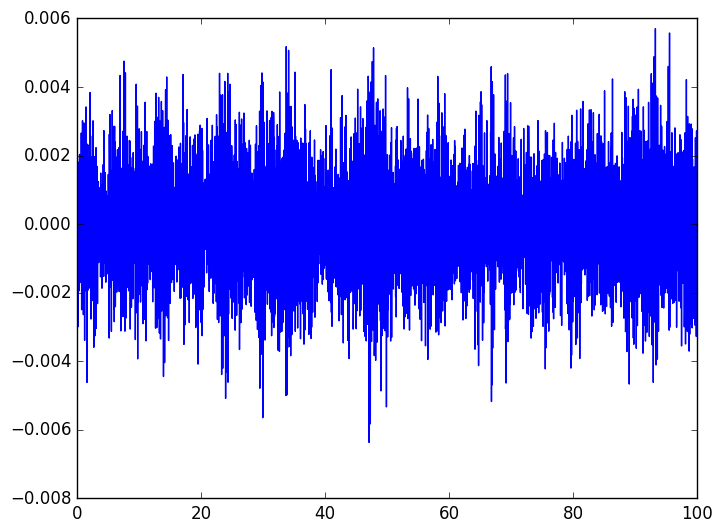

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x835e288c>

In [8]:
node_pl = 5
y = q2[2*node_pl-1,:]
plot(time,y)

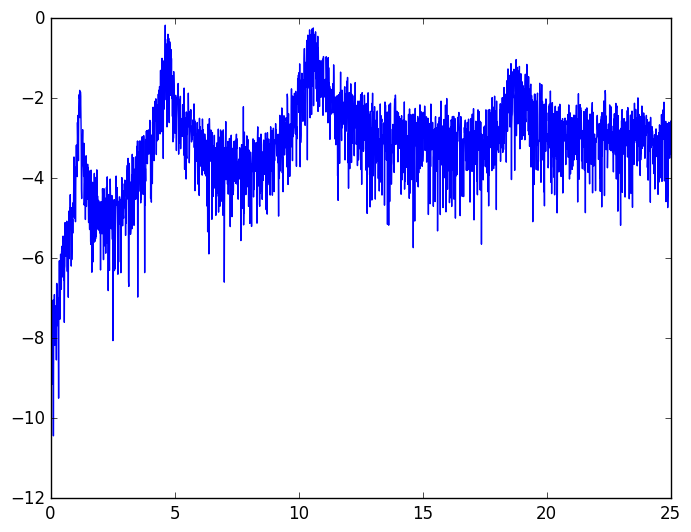

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x839e068c>

In [9]:
# frequency domain
Y = fft(y)
# vector of frequencies
df = 1/(nt*dt)
freq = (0:nt-1)*df
Ymod = abs(Y) # modulus
plot(freq[1:Int(nt/2)+1],log(Ymod[1:Int(nt/2)+1]))